In [3]:
import matplotlib.pyplot as plt
import math 
import numpy as np 
import numpy.linalg as lin
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
%matplotlib inline

                      Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
                                            
####                 Отчет по лабораторной работе "Численное решение систем линейных уравнений, численное интегрирование"

                                              
                                                 Вариант 19
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                          Выполнила: Широкова Анастасия, 430 гр.
                                          
                                                                          Проверил: Шиндин А. В.

                                         Нижний Новгород, 2016 год.

##  Содержание
1. Задача
3. Используемые алгоритмы
4. Программа


### Задание   
1. Выполнить задание указанное в билете (3 балла)

2. Обеспечить работу программы с исходной функцией в режиме «черного ящика» (black box). (+3 балла).

3. Обеспечить работу программы с функциями с размерностью на единицу выше заданной. (+3 балла)

4. Обеспечить работу программы с функциями любой размерности (до  10 включительно). (+3 балла)



Найти точку максимума функции $$f(x_1, x_2,x_3) = 4-2(x_1-3)^2-(x_2-2)^2-3(x_3+1)^4$$
Начальная точка: $$[x_1^0 =1, x_2^0 = -3, x_3^0=0]$$
методом сопряженных градиентов. В окрестности точки минимума оценить овражность,
построить линии уровня и траекторию поиска. Исследовать условия сходимости.

#### Метод сопряженных градиентов-для поиска максимума
$$x^{k+1}=x^k+\alpha_kp_k$$
$$ f(x^{k+1}=x^k+\alpha_kp_k)=min_{\alpha>0}f(x^{k+1}=x^k+\alpha p_k)$$
Метод наискорейшего спуска-это двухшаговый метод.
$$p_k=\bigtriangledown f(x^k)+\beta_k p^{k-1}$$ Где $\beta_k$- определяется так:
$$\beta_0=0,\beta_k=\frac{(\bigtriangledown f(x^k),\bigtriangledown f(x^k)-\bigtriangledown f(x^{k-1}))}{\lVert \bigtriangledown f(x^{k-1}) \rVert^2}$$

## Зададим функцию

In [4]:
n=3 #количество переменных
def my_fun(X):
    return 4-2*(X[0]-3)**2-(X[1]-2)**2-3*(X[2]+1)**4

Xo=np.zeros((n)) #начальная точка#
Xo[0]=x0=1; Xo[1]=y0=-3; Xo[2]=z0=0

eps=0.001


### Построение сечений, заданной поверхности

график функции в сечении z = 0


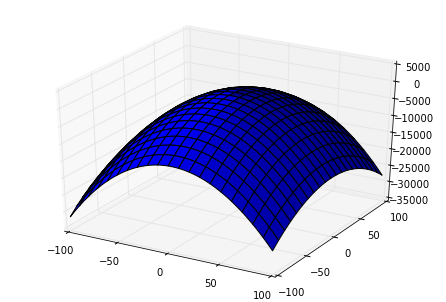

график функции в сечении x = 0


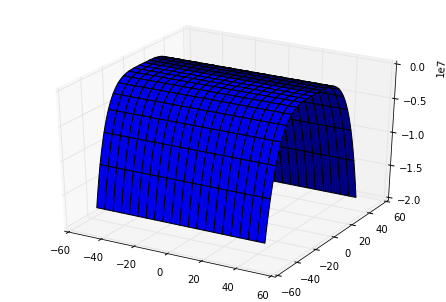

график функции в сечении y = 0


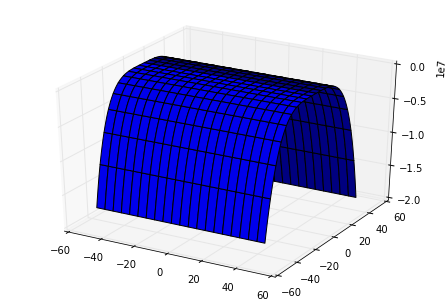

In [5]:
def makeData ():
     # Строим сетку в интервале от -10 до 10 с шагом 0.1 по обоим координатам
    x = np.arange (-100, 100, 1)
    y = np.arange (-100, 100, 1)

     # Создаем двумерную матрицу-сетку
    xgrid, ygrid = np.meshgrid(x, y)

     # В узлах рассчитываем значение функции
    fgrid = my_fun(X=[xgrid,ygrid,0]) 
    return xgrid, ygrid, fgrid

x, y, f = makeData()
print('график функции в сечении z = 0')
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x, y, f)
pylab.show()


def makeData ():
     # Строим сетку в интервале от -10 до 10 с шагом 0.1 по обоим координатам
    y = np.arange (-50, 50, 0.5)
    z = np.arange (-50, 50, 0.5)

     # Создаем двумерную матрицу-сетку
    ygrid, zgrid = np.meshgrid(y, z)

     # В узлах рассчитываем значение функции
    fgrid = my_fun(X=[0,ygrid,zgrid]) 
    return ygrid, zgrid, fgrid

y, z, f = makeData()
print('график функции в сечении x = 0')
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(y, z, f)
pylab.show()

def makeData ():
     # Строим сетку в интервале от -10 до 10 с шагом 0.1 по обоим координатам
    x = np.arange (-50, 50, 0.5)
    z = np.arange (-50, 50, 0.5)

     # Создаем двумерную матрицу-сетку
    xgrid, zgrid = np.meshgrid(x, z)

     # В узлах рассчитываем значение функции
    fgrid = my_fun(X=[xgrid,0,zgrid]) 
    return xgrid, zgrid, fgrid

x, z, f = makeData()
print('график функции в сечении y = 0')
fig = pylab.figure()
axes = Axes3D(fig)
axes.plot_surface(x, z, f)
pylab.show()



In [22]:
def Gr(my_fun,X):
    G=np.zeros((n))
    for i in range (0,n):
        def pri(X):
            H=np.zeros((n))
            H[i]=eps
            P=(my_fun(X+H)-my_fun(X-H))/(2*eps)
            return P
        G[i]=pri(X)
    return G    
#print('Градиент в точке X0:',Gr(my_fun,X=[0,0,0]))   

def msg(my_fun,X0,eps):  
    Al0=0
    
    for l in range (0,1000):
        l=l/100
        if my_fun(Xo+l*(Gr(my_fun,Xo)))<my_fun(Xo+(l+1/100)*(Gr(my_fun,Xo))):
            Al0=l+1/100  
    R=np.zeros((n))
    bet1=0
    p0=Gr(my_fun,X0)
    X1=X0+Al0*Gr(my_fun,Xo)
    it=([my_fun(X0)])
    m1=([0]) 
    m=0 
    X00=X0
    while lin.norm(X1-X00)/lin.norm(X1)>eps:
        m+=1
        bet1=0
        R=Gr(my_fun,X1)-Gr(my_fun,X00)
        for u in range (0,n):
            bet1+=(Gr(my_fun,X1)[u])*R[u]
        bet1=bet1/(lin.norm(Gr(my_fun,X00)))**2
        p1=Gr(my_fun,X1)+p0*bet1 
        for l in range (0,1000):
            l=l/100
            if my_fun(X1+l*p1)<my_fun(X1+(l+1/100)*p1):
                f=l+1/100
        X00=X1     
        X1=X00+f*p1
        p0=p1
        it.append(my_fun(X00))
        m1.append(m)
    print('Количество шагов: ',m)
    print('Найденное максимальное значение функции: ',it[m])
    
    def Hess(my_fun,X):
        hess=np.zeros((n,n))
        eps=0.001
        for t in range(0,n):
            def grhess(X):
                return -Gr(my_fun,X)[t]
            for j in range (0,n):
                def prij(X):
                    H=np.zeros((n))
                    H[j]=eps
                    p=(grhess(X+H)-grhess(X-H))/(2*eps)
                    return p
                hess[t,j]=prij(X)
        return hess     
    # Собственные значения 
    lya=lin.eig(Hess(my_fun,X00))
    print('Показатель овражности: ',min(lya[0])/max(lya[0]))
    
    
    
    return X00

print ('Точка максимума: ',msg(my_fun,X0=[1,-3,0],eps=0.001))
        

Количество шагов:  7
Найденное максимальное значение функции:  3.9999799348
Показатель овражности:  0.0205581483509
Точка максимума:  [ 3.00099382  1.99843612 -1.04778673]


Линии уровня при z=0


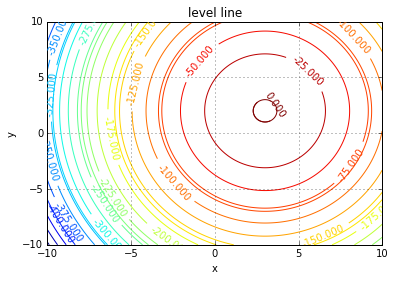

In [15]:
print('Линии уровня при z=0')
def makeData():
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-10, 10, 0.01)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = my_fun(X=[xgrid, ygrid,0])
    return xgrid, ygrid, zgrid
x, y, z = makeData()
x, y, z = makeData()
cs = pylab.contour(x, y, z, 20)
pylab.xlabel('x')
pylab.ylabel('y')
pylab.title('level line')
pylab.clabel(cs)
pylab.contour(x, y, z)
pylab.grid(True)